In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [8]:
trainappdata = pd.read_csv('googleplaystore.csv')
trainappdata.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
trainappdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [10]:
trainappdata = trainappdata.rename(columns=str.lower)  #rename to lower cap

In [11]:
trainappdata[trainappdata.duplicated(subset='app')] #finding duplicated

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


In [12]:
trainappdata.drop_duplicates(subset='app', inplace=True, ignore_index=True) #drop duplicated app

In [13]:
trainappdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app             9660 non-null   object 
 1   category        9660 non-null   object 
 2   rating          8197 non-null   float64
 3   reviews         9660 non-null   object 
 4   size            9660 non-null   object 
 5   installs        9660 non-null   object 
 6   type            9659 non-null   object 
 7   price           9660 non-null   object 
 8   content rating  9659 non-null   object 
 9   genres          9660 non-null   object 
 10  last updated    9660 non-null   object 
 11  current ver     9652 non-null   object 
 12  android ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [14]:
trainappdata_clean = trainappdata.copy() #another data 

In [15]:
trainappdata[pd.to_numeric(trainappdata.reviews, errors='coerce').isna()]

,app,category,rating,reviews,size,installs,type,price,content rating,genres,last updated,current ver,android ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [16]:
trainappdata = trainappdata.drop(9300)
trainappdata = trainappdata.reset_index(drop=True)

In [17]:
Category = pd.DataFrame(trainappdata_clean['category'])

In [18]:
Ratings = pd.DataFrame(trainappdata_clean['rating'])
Ratings.head()

,rating
0,4.1
1,3.9
2,4.7
3,4.5
4,4.3


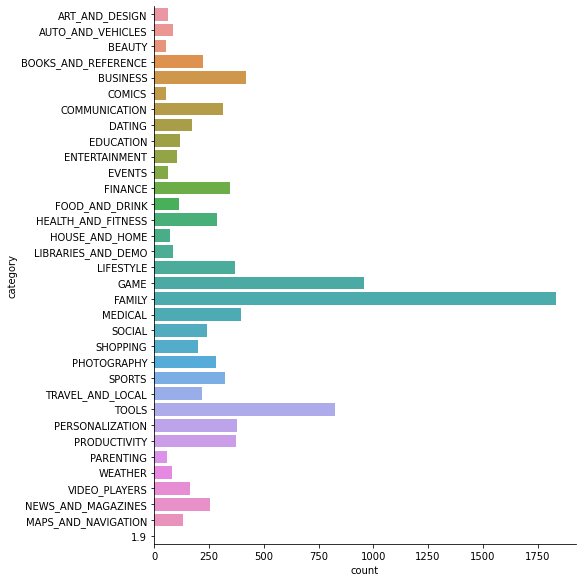

In [19]:
sb.catplot(y = "category", data = Category, kind = "count", height = 8)

<AxesSubplot:xlabel='category', ylabel='rating'>

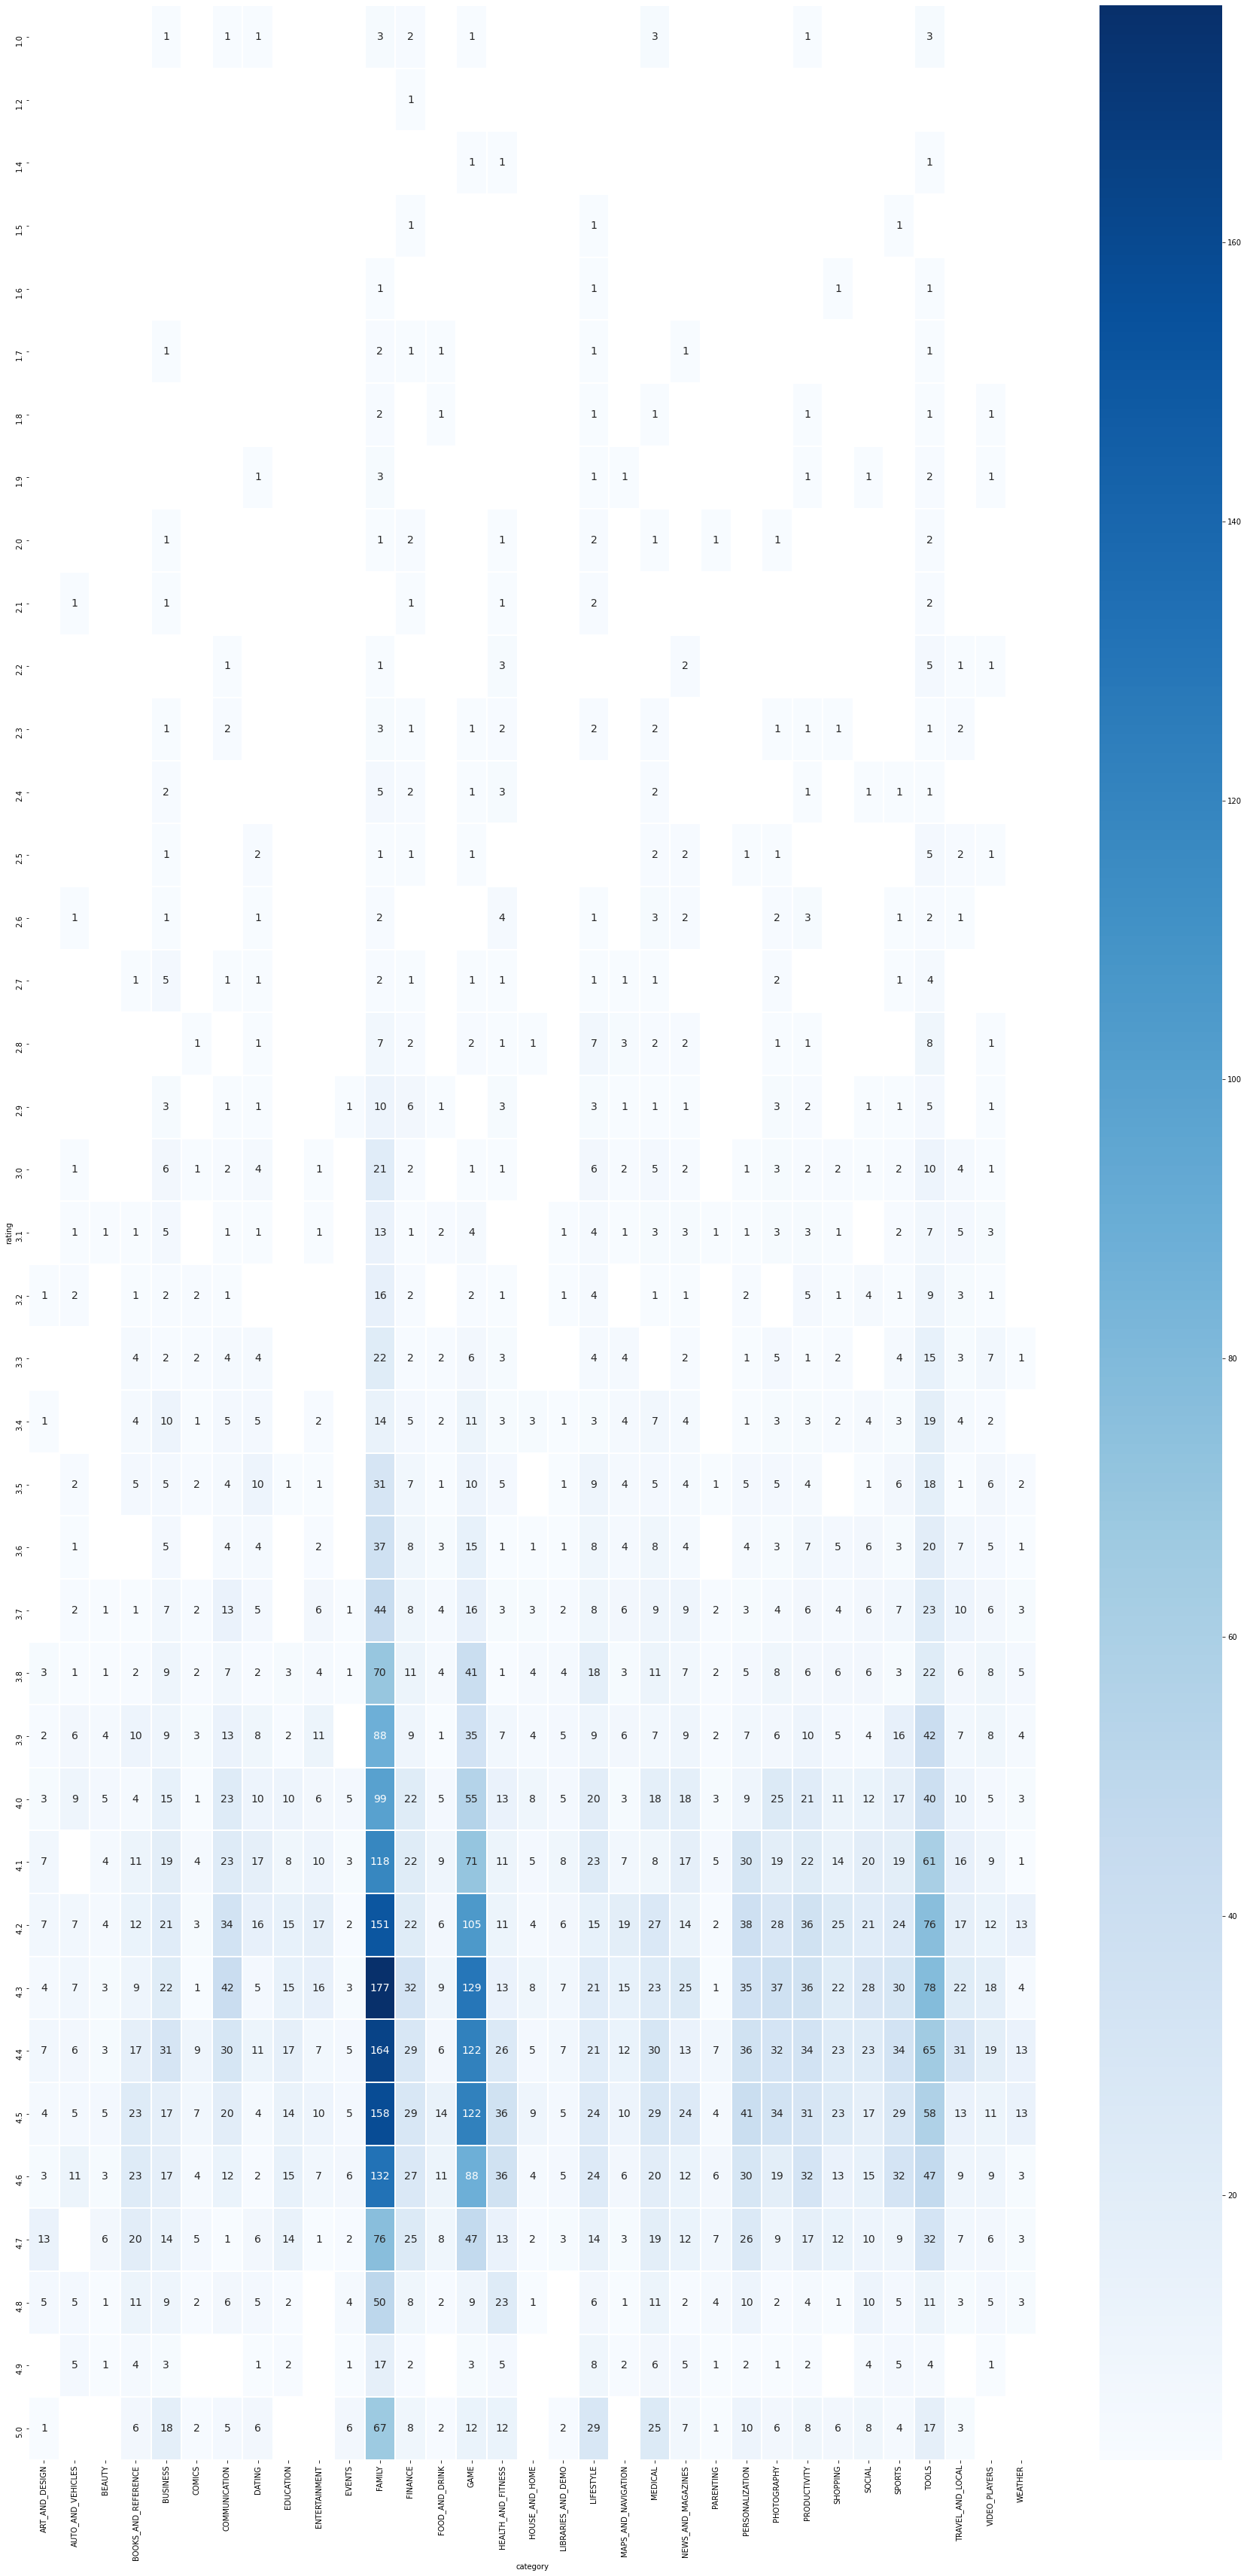

In [35]:
f, axes = plt.subplots(1, 1, figsize=(30, 60))

sb.heatmap(trainappdata.groupby(['rating', 'category']).size().unstack(),
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 14}, cmap = "Blues")

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))

sb.boxplot(data=trainappdata_clean, x='category', y='rating')

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))

sb.histplot(data=trainappdata_clean['category'], bins=20)

<AxesSubplot:xlabel='rating', ylabel='category'>

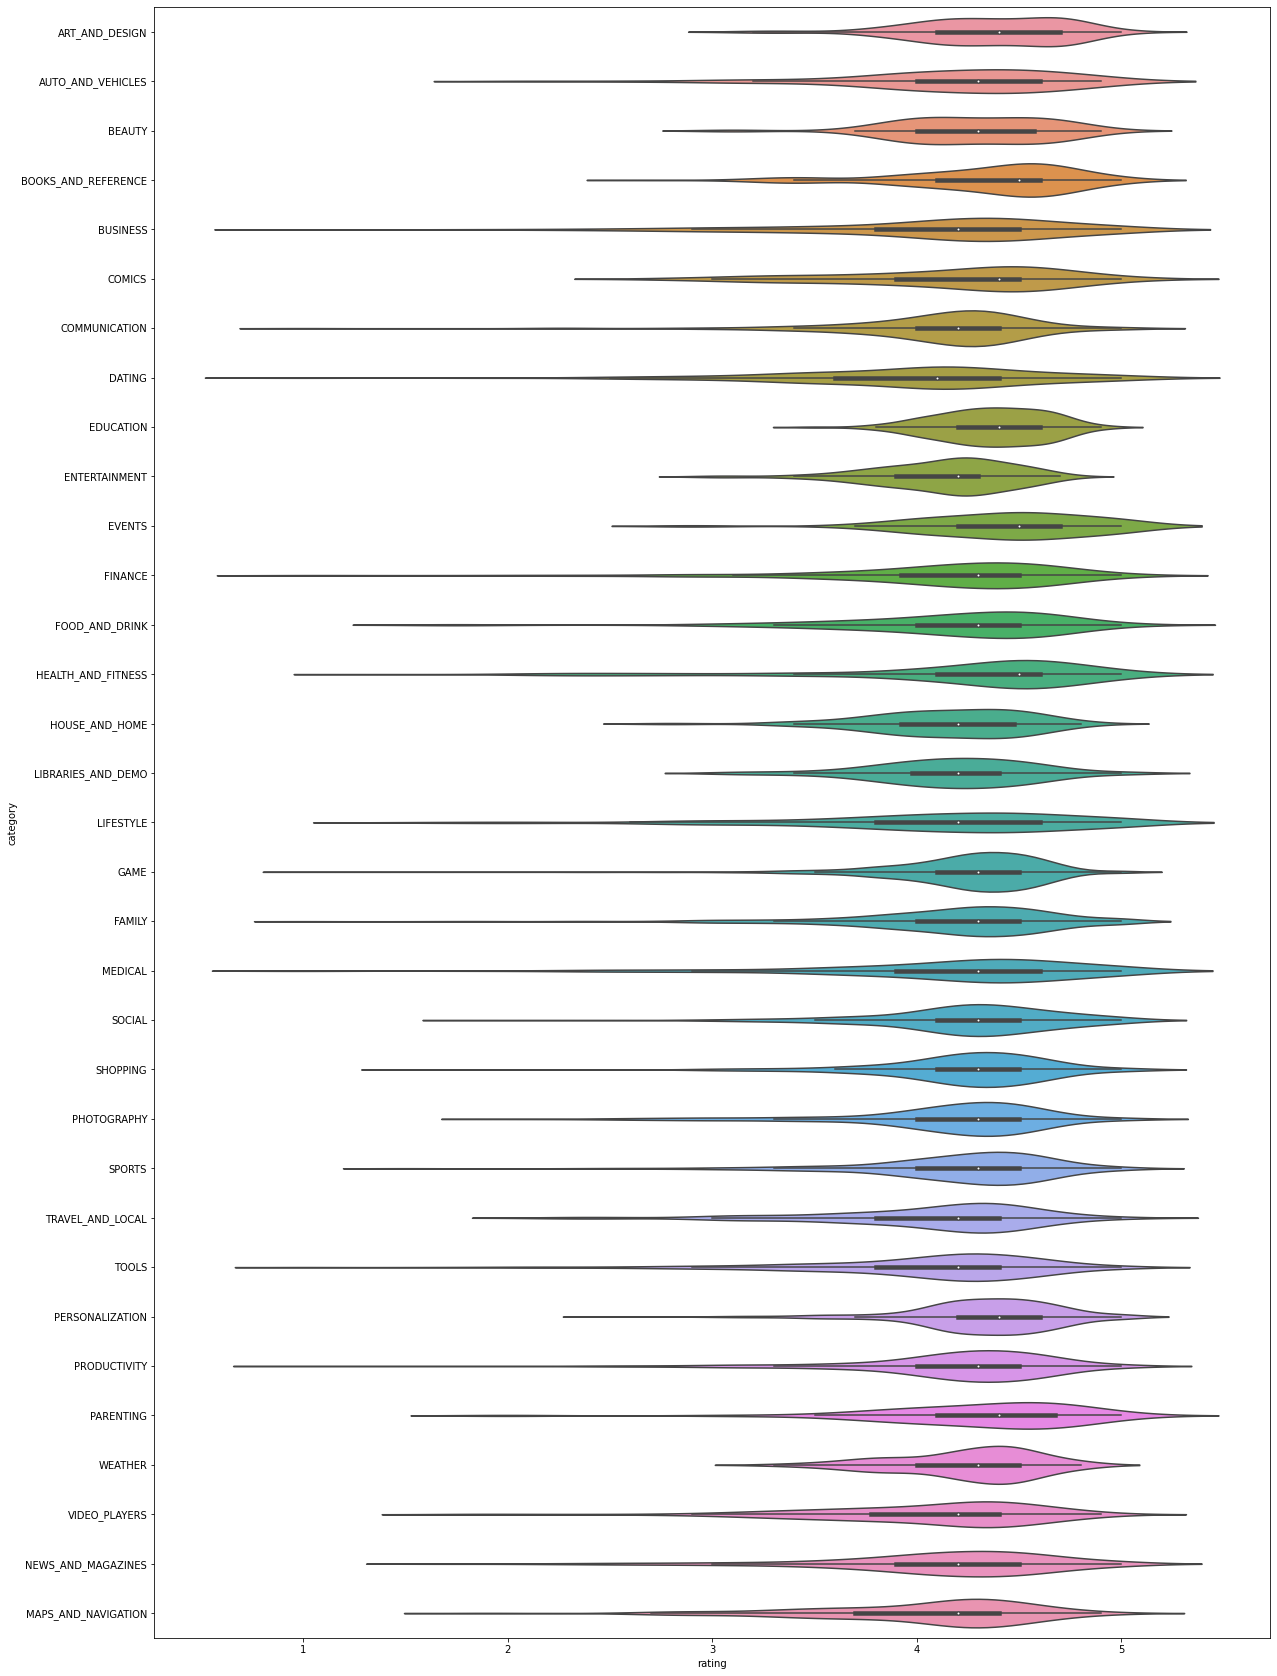

In [34]:
f, axes = plt.subplots(1, 1, figsize=(20, 30))
sb.violinplot(x = 'rating', y ='category' , data = trainappdata, orient = 'h')

In [2]:
# Extract the Features from the Data
Installdata = pd.DataFrame(trainappdata[["Rating", "Category"]])
y = pd.DataFrame(trainappdata["Rating"])

sb.catplot(x = 'Price', kind = 'Rating', data = trainappdata, height = 8)

NameError: name 'pd' is not defined